<a href="https://colab.research.google.com/github/JakeSiewJK64/colabNotebooks/blob/master/ClassificationForVideo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Object Tracking for Video

In [ ]:
import io
import base64
from IPython.display import display, HTML
import time as tm

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
!wget https://github.com/dalgu90/opencv-tutorial/blob/master/videos/vtest.mp4?raw=true

--2020-12-30 08:06:24--  https://github.com/dalgu90/opencv-tutorial/blob/master/videos/vtest.mp4?raw=true
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/dalgu90/opencv-tutorial/raw/master/videos/vtest.mp4 [following]
--2020-12-30 08:06:24--  https://github.com/dalgu90/opencv-tutorial/raw/master/videos/vtest.mp4
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dalgu90/opencv-tutorial/master/videos/vtest.mp4 [following]
--2020-12-30 08:06:25--  https://raw.githubusercontent.com/dalgu90/opencv-tutorial/master/videos/vtest.mp4
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTT

In [ ]:
# helper functions
# open video controller
# only supports video formats:
# 1. mp4
# 2. off
# 3. WebM

def open_video_controller(fpath, width=480, height=360):
  display(HTML(data='''<video alt="test" width=" ''' + str(width) + ''' " height=" ''' + str(height) + ''' controls><source ="''' + fpath + '''" type="video/mp4" /></video>'''))

def open_video_controller2(fpath, width=480, height=360):
  video = io.open(fpath, 'r+b').read()
  encoded = base64.b64encode(video)
  display(HTML(data=''' <video alt="test" 
                    width="''' + str(width) + '''"
                    height="''' + str(height) + '''" controls>
                    <source src = "data:video/mp4; base64, {0}" 
                    type="video/mp4" />
                    </video>'''.format(encoded.decode('ascii'))))

In [ ]:
open_video_controller2('vtest.mp4')

# Open/Save a video

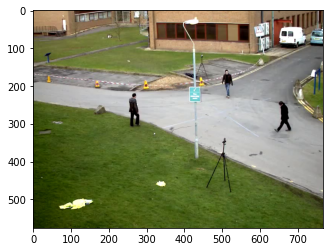

In [ ]:
# open a video with cv2.VideoCapture
vid = cv2.VideoCapture('vtest.mp4')

# grab a frame
ret, frame = vid.read()

# use matplotlib to display the frame
plt.figure()
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [ ]:
# print properties of the video 
print("Frame width: %d" % vid.get(cv2.CAP_PROP_FRAME_WIDTH))
print("Frame height: %d" % vid.get(cv2.CAP_PROP_FRAME_HEIGHT))
print("FPS: %d" % vid.get(cv2.CAP_PROP_FPS))

Frame width: 768
Frame height: 576
FPS: 10


In [ ]:
# saving the video
in_fpath = "vtest.mp4"
v_in = cv2.VideoCapture(in_fpath)

# define the codec and create VideoWriter object
out_fpath = "vtest_flip.mp4"
fourcc = cv2.VideoWriter_fourcc(*'DIVX')
v_out = cv2.VideoWriter(out_fpath, fourcc, 10, (768, 576))

# ret is boolean
# frame is ndarray 
ret, frame = v_in.read()

print("Size of video: {} frames".format(len(frame)))

Size of video: 576 frames


In [ ]:
# flipping the video
counter = 0
time = tm.time()

while(v_in.isOpened()):

  ret, frame = v_in.read()
  if ret:
    # flip the frame horizontally
    frame = cv2.flip(frame, 1)
    
    # write the flipped frame
    v_out.write(frame)

    counter += 1
    print("Step {}\nTime Elapsed: {:.6f} seconds".format(counter, time - tm.time()))    
  
  else:
    break

# release everything if job is finished
v_in.release()
v_out.release()

print("Time elapsed: {}".format(time - tm.time()))
print('Done!')

Time elapsed: -0.00016069412231445312
Done!


In [ ]:
open_video_controller('vtest_flip.mp4')

# Tracker

(576, 768, 3)


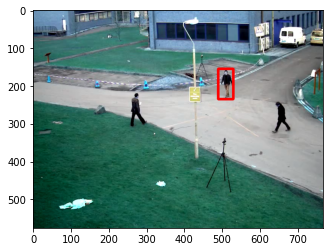

In [50]:
# set up tracker
# instead of MIL, we can also use
# 1. BOOSTING
# 2. KCF
# 3. TLD
# 4. MEDIANFLOW
# 5. GOTURN

tracker = cv2.TrackerMIL_create()
vid_fpath = "vtest.mp4"
vid = cv2.VideoCapture(vid_fpath)

# read first frame 
ret, frame = vid.read()

if not ret:
  print("Cannot read video")
  sys.exit()

# define initial bounding box
bbox = (495, 155, 40, 80)

# uncomment the line below to select a different bounding box
# bbox = cv2.selectROI(frame, False)

# initlize tracker with first frame and bounding box
ret = tracker.init(frame, bbox)
print(frame.shape)

while True:
  ret, frame = vid.read()
  if not ret:
    break
  
  # updating the tracker
  ret, bbox = tracker.update(frame)
  
  # draw bounding box
  if ret:
    p1 = (int(bbox[0]), int(bbox[1]))
    p2 = (int(bbox[0] + bbox[2]), int(bbox[1] + bbox[3]))
    cv2.rectangle(frame, p1, p2, (255,0,0), 5)       

  # display the result
  plt.imshow(frame)
  plt.show()
  
  break # remove 'break' to display all the frames in the video



# References
- http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_gui/py_video_display/py_video_display.html
- http://docs.opencv.org/trunk/d7/d8b/tutorial_py_lucas_kanade.html
- https://www.learnopencv.com/object-tracking-using-opencv-cpp-python/
- https://github.com/dalgu90/opencv-tutorial/blob/master/7_tracking.ipynb